# **Hands-on 3: K-means Notebook (Tutorial)**

**Alumno: Claudio Francisco Ponce Sandoval**


---

# Fundamentos de la técnica  (breve resumen).


La técnica K-Means (K-Medias) es un algoritmo de **aprendizaje no supervisado** y uno de los métodos de agrupamiento (clustering) más populares.

Su objetivo es dividir un conjunto de $N$ puntos de datos en $K$ grupos (o *clusters*) distintos, donde $K$ es un número que nosotros definimos de antemano.

**¿Cómo funciona?**
El algoritmo funciona alrededor del concepto de "centroide", que es el centro geométrico (la media) de un cluster.

1.  **Paso de Asignación:** Cada punto de datos se asigna al cluster cuyo **centroide esté más cercano** a él (usualmente usando la distancia euclidiana).
2.  **Paso de Actualización:** Una vez que todos los puntos han sido asignados, el centroide de cada cluster se **mueve** al nuevo centro (la **media**) de todos los puntos que ahora pertenecen a ese cluster.

Estos dos pasos se repiten hasta que los centroides dejan de moverse, lo que significa que los grupos están estables.

# Modelo Matemático.


El algoritmo intenta encontrar los grupos donde los puntos estén lo más "apretados" o cercanos posible a su centroide.


Si tenemos $K$ clusters, el objetivo es minimizar la suma $J$:

$$
J = \sum_{j=1}^{K} \sum_{x \in S_j} ||x - \mu_j||^2
$$

Donde:
* $K$ es el número de clusters.
* $S_j$ es el conjunto de puntos que pertenecen al cluster $j$.
* $\mu_j$ es el centroide (la media) del cluster $j$.
* $||x - \mu_j||^2$ es la **distancia euclidiana al cuadrado** entre un punto $x$ y el centroide de su cluster $\mu_j$.

---

### Fórmulas del Proceso

El algoritmo utiliza dos fórmulas matemáticas en su bucle para minimizar $J$:

**a) Paso de Asignación (Encontrar el más cercano):**
Para cada punto $x$, se asigna al cluster $j$ que tenga la distancia euclidiana al cuadrado más corta:

$$
\text{Cluster}(x) = \operatorname{argmin}_{j \in \{1, ..., K\}} ||x - \mu_j||^2
$$

**b) Paso de Actualización (Calcular la media):**
Se actualiza la posición de cada centroide $\mu_j$ calculando la media de todos los puntos $x$ asignados a su cluster $S_j$. (Donde $|S_j|$ es el número de puntos en el cluster $j$).

$$
\mu_j(\text{nuevo}) = \frac{1}{|S_j|} \sum_{x \in S_j} x
$$

# Descripción de librerías, clases, funciones


- pandas (como pd): Para cargar los datos (pd.read_csv) y manipularlos en estructuras llamadas DataFrames (ej. clientes.describe(), clientes[...]).

- matplotlib.pyplot (como plt): Es la biblioteca base para crear gráficos. Fue usada para funciones como plt.scatter, plt.figure, plt.title, plt.show, etc.

- numpy (como np): La biblioteca fundamental para cálculos numéricos en Python.

- sklearn (Scikit-learn): La biblioteca principal de Machine Learning.

- kmeans.fit(): El entrenamiento del modelo. Calculó los centroides de los 2 clusters basándose en X_escalado.

- accuracy_score(): Usada para calcular el porcentaje de aciertos comparando las etiquetas reales (y_true) con las predichas (y_pred_corregidas).



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

clientes = pd.read_csv("creditos.csv")
clientes


,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


# Preprocesamiento


In [2]:
clientes.describe()


,edad,credito,cumplio
count,200.000000,200.000000,200.000000
mean,37.280000,289946.670000,0.835000
std,9.148776,137945.585277,0.372112
min,18.000000,100000.000000,0.000000
25%,29.000000,172966.500000,1.000000
50%,37.500000,276234.000000,1.000000
75%,45.000000,394574.500000,1.000000
max,57.000000,596771.000000,1.000000


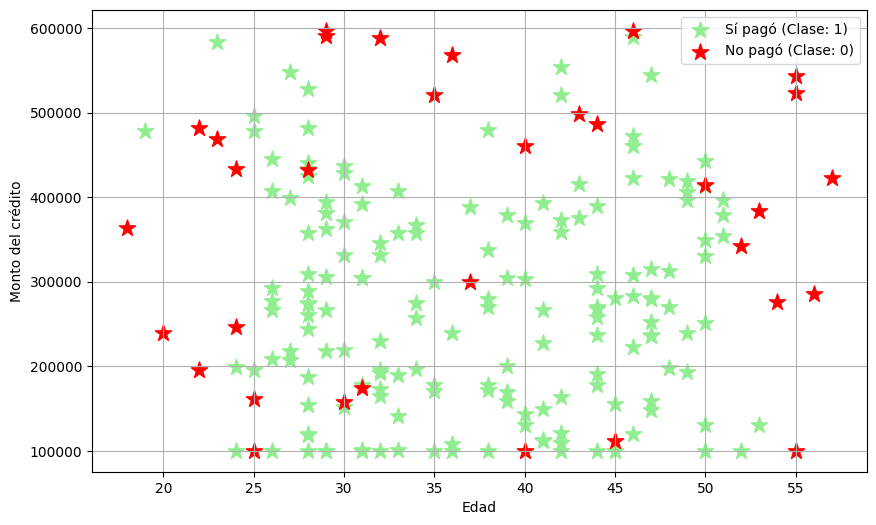

In [3]:
# Gráfico de Dispersión de los datos reales

plt.figure(figsize=(10, 6))

buenos = clientes[clientes["cumplio"]==1]
malos = clientes[clientes["cumplio"]==0]

# Graficamos
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="lightgreen", label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", label="No pagó (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Preparación de Datos para K-Means

X = clientes[["edad", "credito"]]
y_true = clientes["cumplio"]

# Creamos y ajustamos el escalador
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

print("Datos escalados (primeras 5 filas):")
print(X_escalado[:5])

Datos escalados (primeras 5 filas):
[[-2.11267406  0.53172366]
 [-2.00309553  1.36640941]
 [-1.893517   -0.36972793]
 [-1.67435994 -0.68809209]
 [-1.67435994  1.39699801]]


# Entrenamiento del Modelo K-Means

Ahora, aplicamos K-Means. Le pediremos que encuentre k=2 clusters, ya que nuestro objetivo es ver si puede encontrar los dos grupos de "cumplio".



¡Modelo K-Means entrenado!
Etiquetas de cluster asignadas primeros 20: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Coordenadas de los Centroides en datos escalados:
[[-0.87881981  0.02440286]
 [ 0.87881981 -0.02440286]]
Estos son los grupos que K-Means encontró por sí solo.


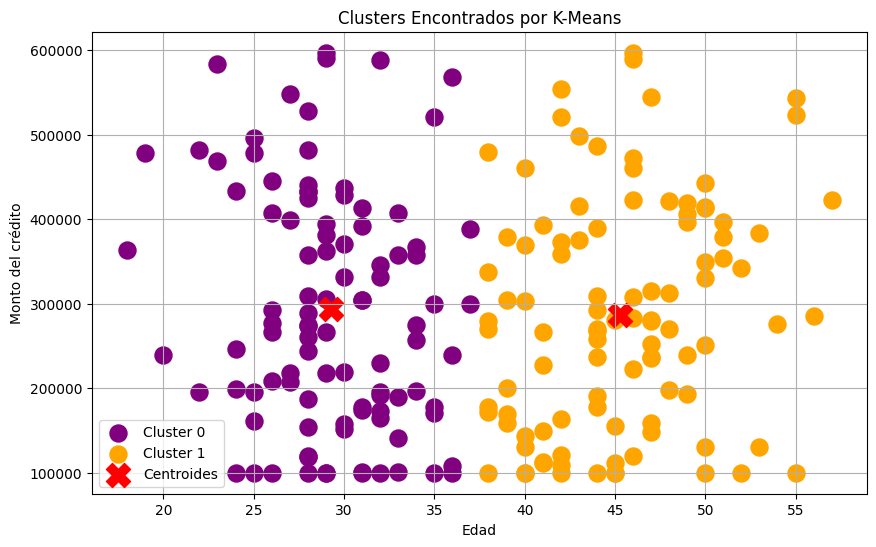

In [8]:
# Creamos la instancia del modelo K-Means y le decimos que busque 2 grupos
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)

# Entrenamos el modelo con los datos escalados
kmeans.fit(X_escalado)

# Obtenemos las etiquetas de cluster que K-Means asignó a cada punto

labels_predichos = kmeans.labels_

# Obtenemos las coordenadas de los centroides
centroides = kmeans.cluster_centers_

print("¡Modelo K-Means entrenado!")
print(f"Etiquetas de cluster asignadas primeros 20: {labels_predichos[:20]}")
print("Coordenadas de los Centroides en datos escalados:")
print(centroides)


print("Estos son los grupos que K-Means encontró por sí solo.")

plt.figure(figsize=(10, 6))

plt.scatter(X["edad"][labels_predichos == 0], X["credito"][labels_predichos == 0],
            s=150, c='purple', label='Cluster 0')
plt.scatter(X["edad"][labels_predichos == 1], X["credito"][labels_predichos == 1],
            s=150, c='orange', label='Cluster 1')


centroides_originales = escalador.inverse_transform(centroides)

# Graficamos los centroides
plt.scatter(centroides_originales[:, 0], centroides_originales[:, 1],
            s=300, c='red', marker='X', label='Centroides')

plt.title("Clusters Encontrados por K-Means")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend()
plt.grid(True)
plt.show()

# Prediction

Esta función recibirá los datos de un nuevo cliente (edad, credito)  y predecirá a qué cluster pertenece.

In [6]:
# Función de Predicción

def predecir_cluster(edad, credito):

    print(f"\n--- Predicción para Edad: {edad}, Crédito: {credito} ---")

    entrada_df = pd.DataFrame([[edad, credito]], columns=["edad", "credito"])

    entrada_escalada_array = escalador.transform(entrada_df)


    cluster_predicho = kmeans.predict(entrada_escalada_array)[0]

    print(f"Resultado: El cliente pertenece al Cluster {cluster_predicho}")
    return cluster_predicho

# Ejemplos de predicción
predecir_cluster(25, 100000) # Cliente joven, crédito bajo
predecir_cluster(55, 500000) # Cliente mayor, crédito alto


--- Predicción para Edad: 25, Crédito: 100000 ---
Resultado: El cliente pertenece al Cluster 0

--- Predicción para Edad: 55, Crédito: 500000 ---
Resultado: El cliente pertenece al Cluster 1


np.int32(1)

# Model Evaluation


Accuracy inicial (sin alinear): 51.50%
Las etiquetas de K-Means están alineadas.

Accuracy Final (Alineado): 51.50%

 Matriz de Confusión


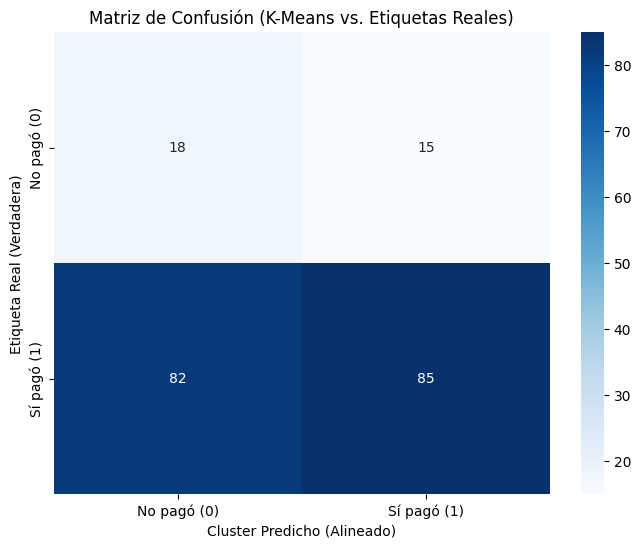

In [10]:

y_pred_kmeans = labels_predichos

acc_inicial = accuracy_score(y_true, y_pred_kmeans)

print(f"Accuracy inicial (sin alinear): {acc_inicial * 100:.2f}%")

# Alineamos las etiquetas
if acc_inicial < 0.5:
    print("Las etiquetas de K-Means están invertidas. Alineando...")

    y_pred_corregidas = np.where(y_pred_kmeans == 0, 1, 0)
else:
    print("Las etiquetas de K-Means están alineadas.")
    y_pred_corregidas = y_pred_kmeans

# Calcular Métricas Finales
# Accuracy
acc_final = accuracy_score(y_true, y_pred_corregidas)
print(f"\nAccuracy Final (Alineado): {acc_final * 100:.2f}%")


# Matriz de Confusión
print("\n Matriz de Confusión")
matriz = confusion_matrix(y_true, y_pred_corregidas)

labels = ['No pagó (0)', 'Sí pagó (1)']

plt.figure(figsize=(8, 6))
sns.heatmap(matriz,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.title('Matriz de Confusión (K-Means vs. Etiquetas Reales)')
plt.ylabel('Etiqueta Real (Verdadera)')
plt.xlabel('Cluster Predicho (Alineado)')
plt.show()



# Referencias Bibliograficas

Na, & Na. (2020, 15 julio). K-Means con Python paso a paso | Aprende Machine Learning. Aprende Machine Learning. https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

W3Schools.com. (s. f.). https://www.w3schools.com/python/python_ml_k-means.asp

GeeksforGeeks. (2025, 22 agosto). K means Clustering – Introduction. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/k-means-clustering-introduction/